In [19]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import math

Data Analysis

In [20]:
#importing the data of systems 1 through 4 for Part 1 a
#os.chdir('/Users/francodelbalso/Downloads')
systems = np.genfromtxt('Part_1a_system1_to_4.csv', delimiter=',')

#seperating the data into each system, 6 trials of 6 measurements per system
system1 = [[],[],[],[],[],[]]
system2 = [[],[],[],[],[],[]]
system3 = [[],[],[],[],[],[]]
system4 = [[],[],[],[],[],[]]

for i in range(len(systems)):
    if i < 36:
        if i < 6:
            system1[0].append(systems[i])
        elif i < 12:
            system1[1].append(systems[i])
        elif i < 18:
            system1[2].append(systems[i])
        elif i < 24:
            system1[3].append(systems[i])
        elif i < 30:
            system1[4].append(systems[i])
        else:
            system1[5].append(systems[i])
    elif i < 72:
        if i < 42:
            system2[0].append(systems[i])
        elif i < 48:
            system2[1].append(systems[i])
        elif i < 54:
            system2[2].append(systems[i])
        elif i < 60:
            system2[3].append(systems[i])
        elif i < 66:
            system2[4].append(systems[i])
        else:
            system2[5].append(systems[i])
    elif i < 108:
        if i < 78:
            system3[0].append(systems[i])
        elif i < 84:
            system3[1].append(systems[i])
        elif i < 90:
            system3[2].append(systems[i])
        elif i < 96:
            system3[3].append(systems[i])
        elif i < 102:
            system3[4].append(systems[i])
        else:
            system3[5].append(systems[i])
    elif i < 144:
        if i < 114:
            system4[0].append(systems[i])
        elif i < 120:
            system4[1].append(systems[i])
        elif i < 126:
            system4[2].append(systems[i])
        elif i < 132:
            system4[3].append(systems[i])
        elif i < 138:
            system4[4].append(systems[i])
        else:
            system4[5].append(systems[i])

# system1 = np.transpose(system1)
# system2 = np.transpose(system2)
# system3 = np.transpose(system3)
# system4 = np.transpose(system4)



print(system1)


[[9.0, 45.0, 82.0, 119.0, 156.0, 191.0], [11.0, 46.0, 84.0, 123.0, 160.0, 197.0], [6.0, 41.0, 78.0, 114.0, 152.0, 189.0], [10.0, 45.0, 83.0, 119.0, 157.0, 194.0], [44.0, 83.0, 119.0, 158.0, 195.0, 231.0], [46.0, 84.0, 121.0, 159.0, 195.0, 233.0]]


In [21]:
#defining quantities
#masses in kg lengths in m
mass25 = 24.4373/1000
mass50 = 50.1393/1000
SpulleyM = 10.0231/1000
SpulleyR = (24.99/2)/1000
LpulleyM = 36.0243/1000
LpulleyR = (50/2)/1000
LowSteelM = 1346.7/1000
LowSteelR = (126.32/2)/1000
UpSteelM = 1354.8/1000
UpSteelR = (126.56/2)/1000
UpAlumM = 470.8/1000
UpAlumR = (126.25/2)/1000
washerM = 1.0306/1000
cylM = 25.48/1000
cylRout = (22.93/2)/1000
cylRin = (15.78/2)/1000
spindleM = 15.83/1000
g_montreal = 9.789

In [22]:
#defining uncertainties in quantities

mass25_unc = 0.0001/1000
mass50_unc = 0.0001/1000
SpulleyM_unc = 0.0001/1000
SpulleyR_unc = 0.01/1000
LpulleyM_unc = 0.0001/1000
LpulleyR_unc = 0.01/1000
LowSteelM_unc = 0.1/1000
LowSteelR_unc = 0.01/1000
UpSteelM_unc = 0.1/1000
UpSteelR_unc = 0.01/1000
UpAlumM_unc = 0.1/1000
UpAlumR_unc = 0.01/1000
washerM_unc = 0.0001/1000
cylM_unc = 0.01/1000
cylRout_unc = 0.01/1000
cylRin_unc = 0.01/1000
spindleM_unc = 0.01/1000
g_montreal_unc = 0.001
ruler_unc = 0.05/100 #cm to m
#For frequency data, uncertainty is set to 1 due to instrumental uncertainties (digital equipment)
frequency_unc = 1

5.1

In [23]:
#Error propagation functions

def mult_div_unc(Z, aA, A, n, aB, B, m):
    return ( Z * ( (n*aA/A)**2 + (m*aB/B)**2 )**0.5 )
def mult_div_unc_3terms(Z, aA, A, n, aB, B, m, aC, C, l):
    return (Z * ( (n*aA/A)**2 + (m*aB/B)**2 + (l*aC/C)**2)**0.5)
def add_sub_unc(aA, n, aB, m):
    return ( ((n*aA)**2 + (m*aB)**2)**0.5 )
def add_sub_array_unc(array):
    sum = 0
    for i in range(len(array)):
        sum += array[i]**2
    return sum**0.5

In [24]:
#calculating the angular acceleration and its uncertainty
#here, 6 values will be used, but only 5 acceleratons will be calculated

def AverageAngularAcc(system, Rdisk, Rdisk_unc):
    bigsum = 0
    sum_unc = []
    for i in range(len(system[0])):      
        dt = 1 #we are taking 1 second timesteps
        sum = 0
        for j in range(len(system[0])):
            if j == 0: #only need first value for vprev
                continue
            v = system[i][j]*0.002 #tangential velocity as defined in manual
            vprev = system[i][j-1]*0.002
            
            dw = (v-vprev)/Rdisk #change in angular velocity
        
            a = dw/dt
            sum += a
        accAverage = sum/(len(system[0])-1)
        bigsum += accAverage
        
#         v_unc = mult_div_unc(v, frequency_unc, system[1][i],1, 0.00001, 0.002, 1)
#         vprev_unc = mult_div_unc(vprev, frequency_unc, system[1][i-1], 1, 0.00001, 0.002, 1)
#         v_sub_vprev_unc = add_sub_unc(v_unc, 1, vprev_unc, 1)
#         dw_unc = mult_div_unc(dw, v_sub_vprev_unc, (v - vprev), 1, Rdisk_unc, Rdisk, 1)
#         a_unc = dw_unc #since dt = 1
#         sum_unc.append(a_unc)
    a_avg = bigsum/(len(system[0])-1) #average of the 5 calculated accels
#     a_unc = add_sub_array_unc(sum_unc) / len(sum_unc)
    a_unc = 0
    
    return a_avg, a_unc

a1 = AverageAngularAcc(system1,UpSteelR, UpSteelR_unc)[0]
a2 = AverageAngularAcc(system2,UpSteelR, UpSteelR_unc)[0]
a3 = AverageAngularAcc(system3,UpSteelR, UpSteelR_unc)[0]
a4 = AverageAngularAcc(system4,UpSteelR, UpSteelR_unc)[0]

a1_unc = AverageAngularAcc(system1,UpSteelR, UpSteelR_unc)[1]
a2_unc = AverageAngularAcc(system2,UpSteelR, UpSteelR_unc)[1]
a3_unc = AverageAngularAcc(system3,UpSteelR, UpSteelR_unc)[1]
a4_unc = AverageAngularAcc(system4,UpSteelR, UpSteelR_unc)[1]

#calculating moments of inertia and its uncertainty
#will be adding I of pulley to I of disk since they both make up the rotating system
#will be using Icylinder = (MR**2)/2

I_UpSteel = (UpSteelM*UpSteelR**2)/2
I_Spully = (SpulleyM*SpulleyR**2)/2
I_Lpully = (LpulleyM*LpulleyR**2)/2

I_UpSteel_unc = mult_div_unc(2*I_UpSteel, UpSteelM_unc, UpSteelM, 1, UpSteelR_unc, UpSteelR, 2)
I_Spulley_unc = mult_div_unc(2*I_Spully, SpulleyM_unc, SpulleyM, 1, SpulleyR_unc, SpulleyR, 2)
I_Lpulley_unc = mult_div_unc(2*I_Lpully, LpulleyM_unc, LpulleyM, 1, LpulleyR_unc, LpulleyR, 2)

I1 = (UpSteelM*UpSteelR**2)/2 + (SpulleyM*SpulleyR**2)/2
I2 = (UpSteelM*UpSteelR**2)/2 + (SpulleyM*SpulleyR**2)/2
I3 = (UpSteelM*UpSteelR**2)/2 + (LpulleyM*LpulleyR**2)/2
I4 = ((UpSteelM*UpSteelR**2)+(LowSteelM*LowSteelR**2))/2 + (LpulleyM*LpulleyR**2)/2

I1_unc = add_sub_unc(I_UpSteel_unc, 1, I_Spulley_unc, 1)
I2_unc = add_sub_unc(I_UpSteel_unc, 1, I_Spulley_unc, 1)
I3_unc = add_sub_unc(I_UpSteel_unc, 1, I_Lpulley_unc, 1)
#I4_unc = 


#the torque Ia and its uncertainty Ia_unc will be determined for each system

Ia1 = I1*a1
Ia2 = I2*a2
Ia3 = I3*a3
Ia4 = I4*a4

Ia1_unc = mult_div_unc(Ia1, I1_unc, I1, 1, a1_unc, a1, 1)
Ia2_unc = mult_div_unc(Ia2, I2_unc, I2, 1, a2_unc, a2, 1)
Ia3_unc = mult_div_unc(Ia3, I3_unc, I3, 1, a3_unc, a3, 1)
#Ia4_unc = mult_div_unc(Ia4, I4_unc, I4, 1, a4_unc, a4, 1)

#Now determining the torque by the Fr = mgr method and its uncertainty
#m is mass, g is gravitational acceleration, r is radius of pulley

Fr1 = mass25*g_montreal*SpulleyR
Fr2 = mass50*g_montreal*SpulleyR
Fr3 = mass25*g_montreal*LpulleyR
Fr4 = mass25*g_montreal*LpulleyR

Fr1_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, SpulleyR, 1)
Fr2_unc = mult_div_unc_3terms(Fr2, mass50_unc, mass50, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, SpulleyR, 1)
Fr3_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, LpulleyR_unc, LpulleyR, 1)
Fr4_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, LpulleyR, 1)

In [25]:
#Calculating uncertainties for angular acceleration
    

print(a1, '±', a1_unc)
print(a2, '±', a2_unc)
print(a3, '±', a3_unc)
print(a4, '±', a4_unc)

1.4020227560050569 ± 0
2.812895069532238 ± 0
2.575221238938053 ± 0
1.3059418457648544 ± 0


In [26]:
#Comparing the torques by %difference

#system1
percentDif1 = 100*abs(Fr1-Ia1)/np.mean([Fr1,Ia1])
print(percentDif1)

#system2
percentDif2 = 100*abs(Fr2-Ia2)/np.mean([Fr2,Ia2])
print(percentDif2)

#system3
percentDif3 = 100*abs(Fr3-Ia3)/np.mean([Fr3,Ia3])
print(percentDif3)

#system4
percentDif4 = 100*abs(Fr4-Ia4)/np.mean([Fr4,Ia4])
print(percentDif4)

23.99893088379765
21.788673978448447
15.913943172086556
16.628504231055125


5.1.1

In [9]:
#importing time-distance measurements
distanceTime = np.genfromtxt('distanceTimes.csv', delimiter=',')
distanceTime = np.transpose(distanceTime)
print(distanceTime)

[[15.   30.   45.   60.   75.   90.  ]
 [ 4.48  6.14  7.68  8.76  9.82 10.77]]


In [10]:
#decrease in potential energy
def dU(measures):
    dUs = []
    dUs_unc = []
    for i in range(len(measures[0])):
        U = mass25*g_montreal*(measures[0][i]/100)
        dUs.append(U)
        dUs_unc.append(mult_div_unc_3terms(U, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, ruler_unc, measures[0][i]/100, 1))
    return dUs, dUs_unc


#kinetic energy gained by the mass
def KEmass(measures):
    dKmasses = []
    finalVs = []
    for i in range(len(measures[0])):
        dh = measures[0][i]/100 #cm to meters 
        t = measures[1][i] 
        A = 2*dh/t**2 #a as defined in manual
        v = np.sqrt(2*A*dh) #final velocity
        finalVs.append(v)
        dKmasses.append((mass25*v**2)/2) #formula for kinetic energy
    return finalVs, dKmasses


#rotational energy gained by rotating disk
def REdisk(velocities):
    REs = []
    I = (UpSteelM*UpSteelR**2)/2 + (SpulleyM*SpulleyR**2)/2
    for i in range(len(velocities)):
        w = velocities[i]/SpulleyR #final angular velocity from the final velocity of mass and v = rw
        REs.append((I*w**2)/2) #formula for rotational kinetic energy
    return REs


#getting total energy gained
def Egained(KE,RE): 
    gained = []
    for i in range(len(KE)):
        gained.append(KE[i]+ RE[i])
    return gained

    
#percent difference between E gained and potential lost
def percentDiff(U,E):
    percents = []
    for i in range(len(U)):
        diff = 100*abs(U[i]-E[i])/np.mean([U[i],E[i]]) #percent difference formula
        percents.append(diff)
    return percents


potentials = dU(distanceTime)[0]
velocities, kineticsMass = KEmass(distanceTime) 
rotEnergies = REdisk(velocities)
Egained = Egained(kineticsMass,rotEnergies)
#pctDiffs = percentDiff(potentials,Egained)

potentials_unc = dU(distanceTime)[1]

print(potentials)
print(potentials_unc)
print(Egained)
print(pctDiffs)
    


[0.035882509455, 0.07176501891, 0.10764752836500001, 0.14353003782, 0.179412547275, 0.21529505673000002]
[0.0001250993252300365, 0.00014028856641141367, 0.00016247856172544193, 0.00018922220968165, 0.0002188564979960244, 0.00025035704355020813]
[0.03902092788324105, 0.08309537830510677, 0.11950159164242574, 0.16329218135314133, 0.2030348801304855, 0.2430662800530105]


NameError: name 'pctDiffs' is not defined

In [11]:
#least squares fit on potential lost vs kinetic energy gained

def leastSquares(x,y, xerror):
    #getting my sums
    sumX = 0
    for i in x:
        sumX += i
    
    sumX2 = 0
    for i in x:
        sumX2 += i**2
    
    sumY = 0
    for i in y:
        sumY += i
    
    sumXY = 0
    for i in range(len(x)):
        sumXY += x[i]*y[i]
    
    N = len(x)
    delta = (N*sumX2) - (sumX)**2
    
    #determining parameters m (gradient) and c (intercept)
    c = (sumX2*sumY - sumX*sumXY)/delta
    
    m = (N*sumXY - sumX*sumY)/delta
    
    #the common uncertainty aCU
    #first need sum involving m and c
    sumMC = 0
    for i in range(len(x)):
        sumMC += (y[i] - m*x[i] - c)**2
    
    aCU = np.sqrt((1/(N-2))*sumMC)
    
    #now error on m (aM) and error on c (aC)  
    aM = aCU*np.sqrt(N/delta)
    aC = aCU*np.sqrt(sumX2/delta)
    
    #finally plotting
    lineX = np.linspace(0,x[-1], 200)
    lineY = m*lineX + c
    testErrors = [0.02,0.01,0.03,0.02,0.02,0.01]
    
    fig, ax = plt.subplots(figsize=(5,3))
    ax.errorbar(x,y, xerr=xerror, yerr=testErrors, markersize=4, elinewidth=1, c='r', fmt='o')
    ax.set_title('Correspondence Between Potential Lost and Energy of Motion Gained')
    ax.set_xlabel('Loss in Potential Energy')
    ax.set_ylabel('Gain in Motion Energy')
    
    ax.plot(lineX,lineY)


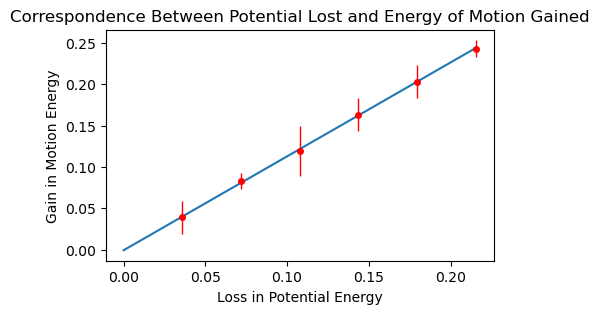

In [12]:
leastSquares(potentials, Egained, potentials_unc)
